In [48]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from datetime import timedelta
from datetime import datetime
import seaborn as sns
import pydotplus
import PIL
from sklearn.tree import export_graphviz

from math import log

In [49]:
# # https://www.kaggle.com/pavanraj159/olympics-history-1896-2016/data
olympics = pd.read_csv("https://abe-southside-final-project.s3.us-east-2.amazonaws.com/athlete_events.csv",index_col=[0])
olympics.dtypes
olympics.count()

Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64

In [369]:
# # https://www.kaggle.com/pavanraj159/olympics-history-1896-2016/data
# olympics = pd.read_csv('athlete_events.csv')
# olympics.head()
# olympics.count()


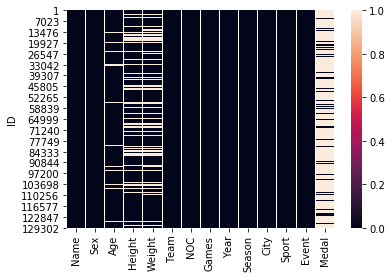

In [50]:
# This data helps us visualize where the null values exist 
sns.heatmap(olympics.isnull())

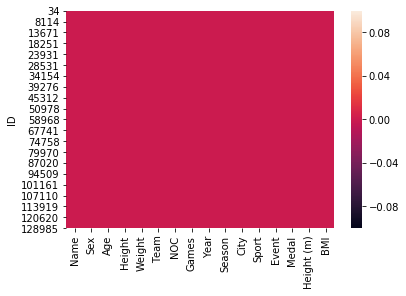

In [51]:
countries = ['USA','BRA','GER','AUS','FRA']
sports = ['Athletics']

olympics = olympics[olympics['NOC'].isin(countries)]
olympics = olympics[olympics['Season'] == 'Summer']
# olympics = olympics[olympics['Sport'].isin(sports)]
# olympics = olympics[olympics['Sex']== 'M']
olympics = olympics[olympics['Height'].notna()]
olympics = olympics[olympics['Age'].notna()]
olympics['Height (m)'] = olympics['Height']/100
olympics = olympics[olympics['Weight'].notna()] 
olympics['BMI'] = round(olympics['Weight']/(olympics['Height (m)']*olympics['Height (m)']),2)
# olympics = olympics[olympics['Medal'] == 'Gold']
# This data helps us visualize where the null values exist 


# wins = ['Gold','Bronze']

# olympics = olympics[olympics['Medal'].isin(wins)]

olympics.loc[(olympics['Medal'] == 'Gold'),'Medal']='Medal'
olympics.loc[(olympics['Medal'] == 'Silver'),'Medal']='Medal'
olympics.loc[(olympics['Medal'] == 'Bronze'),'Medal']='Medal'
olympics.loc[(olympics['Medal'].isna()),'Medal']= 'Non-Medal'

olympics_df = olympics[olympics['Year']< 2016]
olympics_2016 = olympics[olympics['Year'] == 2016]

sns.heatmap(olympics.isnull())

In [52]:
olympics_2016

olympics_2016.groupby(['NOC']).count().sort_values('BMI',ascending = False)

,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,Height (m),BMI
NOC,,,,,,,,,,,,,,,
USA,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718
BRA,581,581,581,581,581,581,581,581,581,581,581,581,581,581,581
GER,535,535,535,535,535,535,535,535,535,535,535,535,535,535,535
AUS,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512
FRA,511,511,511,511,511,511,511,511,511,511,511,511,511,511,511


In [53]:
olympics_df.head()
# olympics['Weight'].max()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height (m),BMI
ID,,,,,,,,,,,,,,,,
34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",Non-Medal,1.87,21.73
52,Patrick Abada,M,22.0,189.0,80.0,France,FRA,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Pole Vault,Non-Medal,1.89,22.40
73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Medal,1.82,25.96
73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Medal,1.82,25.96
84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Medal,1.65,20.20


Text(0, 0.5, 'Weight')

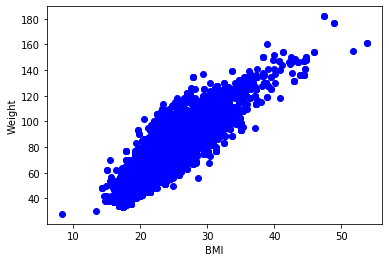

In [54]:
H = olympics_df['Height (m)']
W = olympics_df['Weight']
A = olympics_df['Age']
B = olympics_df['BMI']
M = olympics_df['Medal']

plt.scatter(B,W,c="blue")
plt.xlabel("BMI")
plt.ylabel("Weight")

Text(0, 0.5, 'Height (m)')

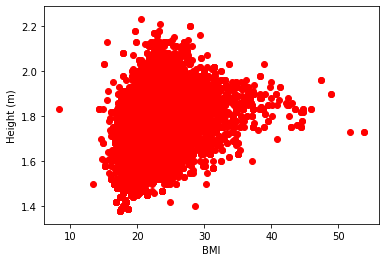

In [55]:
plt.scatter(B,H,c="red")
plt.xlabel("BMI")
plt.ylabel("Height (m)")

Text(0, 0.5, 'Age')

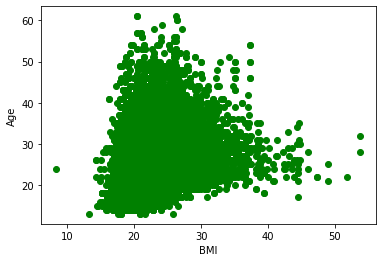

In [56]:
plt.scatter(B,A,c="green")
plt.xlabel("BMI")
plt.ylabel("Age")

No handles with labels found to put in legend.


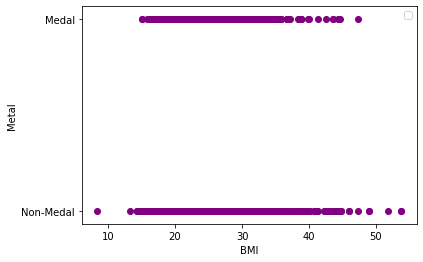

In [57]:
plt.scatter(B,M,c="purple")
plt.xlabel("BMI")
plt.ylabel("Metal")
plt.legend()

plt.show()

In [58]:
olympics_df['Medal'].unique()

array(['Non-Medal', 'Medal'], dtype=object)

### Logistic Regression

In [59]:
X = pd.get_dummies(olympics_df[["Sex", "Age", "Height", "Weight","BMI","NOC"]])
# X = olympics[["BMI","NOC"]]
y = olympics_df["Medal"]
print(X.shape, y.shape)

# plt.scatter(X,y)
X
y

(29204, 11) (29204,)


ID
34        Non-Medal
52        Non-Medal
73            Medal
73            Medal
84            Medal
            ...    
135528    Non-Medal
135530    Non-Medal
135531    Non-Medal
135543    Non-Medal
135566    Non-Medal
Name: Medal, Length: 29204, dtype: object

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
X_test

X_2016 = pd.get_dummies(olympics_2016[["Sex", "Age", "Height", "Weight","BMI","NOC"]])
X_2016

y_2016 = olympics_2016["Medal"]
y_2016

ID
73            Medal
149       Non-Medal
402       Non-Medal
444       Non-Medal
451       Non-Medal
            ...    
134960    Non-Medal
134998    Non-Medal
135037    Non-Medal
135525        Medal
135528    Non-Medal
Name: Medal, Length: 2857, dtype: object

In [64]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7642332100625485
Testing Data Score: 0.7652376386796329


In [66]:
predictions = classifier.predict(X_2016)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_2016[:10].tolist()}")

First 10 Predictions:   ['Non-Medal' 'Non-Medal' 'Non-Medal' 'Non-Medal' 'Non-Medal' 'Non-Medal'
 'Non-Medal' 'Non-Medal' 'Non-Medal' 'Non-Medal']
First 10 Actual labels: ['Medal', 'Non-Medal', 'Non-Medal', 'Non-Medal', 'Non-Medal', 'Non-Medal', 'Medal', 'Non-Medal', 'Non-Medal', 'Non-Medal']


In [67]:
Testing = pd.DataFrame({"Prediction": predictions, "Actual": y_2016}).reset_index(drop=True)
Testing

,Prediction,Actual
0,Non-Medal,Medal
1,Non-Medal,Non-Medal
2,Non-Medal,Non-Medal
3,Non-Medal,Non-Medal
4,Non-Medal,Non-Medal
...,...,...
2852,Non-Medal,Non-Medal
2853,Non-Medal,Non-Medal
2854,Non-Medal,Non-Medal
2855,Non-Medal,Medal


In [68]:
pd.crosstab(Testing['Actual'],Testing['Prediction'])

Prediction,Medal,Non-Medal
Actual,,
Medal,55,595
Non-Medal,25,2182


## Visualize Actuals and Predictions (TB)

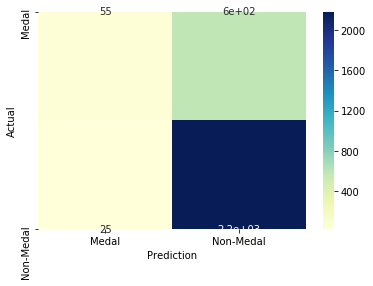

In [69]:
# Reference https://pbpython.com/pandas-crosstab.html
sns.heatmap(pd.crosstab(Testing['Actual'],Testing['Prediction']),cmap="YlGnBu", annot=True, cbar=True)

In [70]:
# Testing[(Testing['Actual'] != 'Others') & (Testing['Prediction'] != 'Others')]
Testing[(Testing['Prediction'] == 'Medal')]
# Testing[(Testing['Prediction'] == 'Non-Medal')]


,Prediction,Actual
13,Medal,Medal
16,Medal,Medal
17,Medal,Medal
18,Medal,Medal
19,Medal,Medal
...,...,...
2593,Medal,Medal
2637,Medal,Medal
2675,Medal,Non-Medal
2742,Medal,Non-Medal


### DECISION TREE

In [71]:
X = pd.get_dummies(olympics_df[["Sex", "Age", "Height", "Weight","BMI","NOC"]])
y = olympics_df["Medal"].values.reshape(-1,1)
print(X.shape, y.shape)
feature_names = X

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

sorted(zip(rf.feature_importances_, feature_names), reverse=True)

(29204, 11) (29204, 1)


[(0.31654815387116525, 'Age'),
 (0.24586072531894315, 'BMI'),
 (0.1805798750185428, 'Weight'),
 (0.1785171903811189, 'Height'),
 (0.034971324603722445, 'NOC_USA'),
 (0.011699770650180215, 'NOC_FRA'),
 (0.007498969189549306, 'Sex_M'),
 (0.007287796561077236, 'Sex_F'),
 (0.0061560008916306, 'NOC_AUS'),
 (0.005847692441638644, 'NOC_GER'),
 (0.005032501072431519, 'NOC_BRA')]

## Visualize Decison Tree

In [72]:
#Create Dot Data
dot_data = tree.export_graphviz(clf,out_file=None,
                               feature_name=iris.feature_names,
                               class_names=iris.target_names)
#Draw Graph
graph = pydotplus.graph_from_dot_data(dot_data)

#Show Graph

NameError: name 'iris' is not defined

## Visualize Features Importance 

In [1]:
# Feature Importance Example 1: https://www.kaggle.com/gpreda/lanl-earthquake-eda-and-prediction
# cols = (feature_importance_df[["Feature", "importance"]]
#         .groupby("Feature")
#         .mean()
#         .sort_values(by="importance", ascending=False)[:200].index)
# best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

# plt.figure(figsize=(14,26))
# sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
# plt.title('LightGBM Features (averaged over folds)')
# plt.tight_layout()
# plt.savefig('lgbm_importances.png')


cols = (olympics_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:200].index)
best_features = olympics_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()
#plt.savefig('lgbm_importances.png')


NameError: name 'olympics_df' is not defined

### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Create a random forest classifier
rf = rf.fit(X, y)
rf.score(X, y)

# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

# We can sort the features by their importance
sorted(zip(rf.feature_importances_, X), reverse=True)

[(0.32210632604814043, 'Age'),
 (0.24422581270152746, 'BMI'),
 (0.17780300498788496, 'Height'),
 (0.1764723694314837, 'Weight'),
 (0.03563454816536956, 'NOC_USA'),
 (0.011849361962063546, 'NOC_FRA'),
 (0.007758591596102521, 'Sex_F'),
 (0.007744064530519014, 'Sex_M'),
 (0.005878457371642099, 'NOC_AUS'),
 (0.005521826875568143, 'NOC_GER'),
 (0.0050056363296985575, 'NOC_BRA')]

In [99]:
#feature_names #(working it's a data frame of classifiers,eg. age, height and the values)
#X #(working it's a data frame of classifiers,eg. age, height and the values) 
#y #(working it's the array of medal and non-medal)
#importances #(working it's a array of weight values)
# rf (working it's the randon classifier info)

,Age,Height,Weight,BMI,Sex_F,Sex_M,NOC_AUS,NOC_BRA,NOC_FRA,NOC_GER,NOC_USA
ID,,,,,,,,,,,
34,30.0,187.0,76.0,21.73,0,1,0,0,1,0,0
52,22.0,189.0,80.0,22.40,0,1,0,0,1,0,0
73,23.0,182.0,86.0,25.96,0,1,0,0,1,0,0
73,27.0,182.0,86.0,25.96,0,1,0,0,1,0,0
84,26.0,165.0,55.0,20.20,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
135528,28.0,181.0,75.0,22.89,0,1,0,0,0,1,0
135530,23.0,202.0,98.0,24.02,0,1,0,0,0,1,0
135531,24.0,172.0,52.0,17.58,1,0,0,0,0,1,0


In [101]:
#Create Dot Data
dot_data = tree.export_graphviz(clf,out_file=None,
                               feature_name=iris.feature_names,
                               class_names=iris.target_names)
#Draw Graph
graph = pydotplus.graph_from_dot_data(dot_data)

AttributeError: 'function' object has no attribute 'feature_names'

In [94]:
cols = (feature_names[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:200].index)
best_features = feature_names.loc[feature_names.Feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()
#plt.savefig('lgbm_importances.png')

KeyError: "None of [Index(['Feature', 'importance'], dtype='object')] are in the [columns]"